In [1]:
import numpy as np
from matplotlib import pyplot as plt
import cv2
from sklearn.metrics.pairwise import euclidean_distances

# Functions

In [3]:
def load_pic(path):
    
    image = cv2.imread(path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    return image

In [4]:
def init_centroid(k, X):
    cen_id = np.random.randint(0, X.shape[0],size=k)
    centroids = X[cen_id]
    #centroids = np.random.randint(0,255,size=(k,3))
    #print(centroids)
    return centroids

In [5]:
#assigning the closest centroid to each point
def find_closest_centroids(cent, X):
    assigned_centroid = np.ones(X.shape)
    #calculating the distance
    distance=euclidean_distances(X, cent)
    assigned_centroid = cent[np.argmin(distance, axis=1)]
    return assigned_centroid

In [6]:
#updating the centroids
def calc_centroids(X,centroids,assigned_centroid):
    new_centroids = np.ones(centroids.shape)
    for c in range(centroids.shape[0]):
        #get all the points in a cluster
        current_cluster = X[np.where(assigned_centroid==centroids[c])[0]]
        distance_avg = list()
        #calculating the average in each cluster , new centroids
        new_centroids[c]=current_cluster.mean(axis=0).astype(int)
    
    return new_centroids

In [7]:
#creating the model
def kmeans(k,X):
    #initialization
    centroids = init_centroid(k, X)
    t = 0
    #print('Initial Centroids:\n', centroids)
    #the loop will stop whenever there is no update, this is done by compring the previous and the current centroids list
    while t==0:
        prev_centroids = centroids.copy()
        #Assigning Clusters
        assigned_centroid = find_closest_centroids(centroids, X)
        #print(assigned_centroid)
        #Updating Centroids
        centroids = calc_centroids(X,centroids,assigned_centroid)
        #print('---------------------')
        #print('New Centroids:')
        #print(centroids)
        if np.allclose(prev_centroids,centroids):
            t=1

    return centroids,assigned_centroid

In [8]:
def ClusterColor(image, k):
    #Reshaping the Image
    imagepix = image.reshape((image.shape[0] * image.shape[1], 3))
    #KMeans Clustering the Pixels to k Clusters
    cluster_centers_, labels_ = kmeans(k, imagepix)
    #Changing Pixel Colors to the k Centroids Colors
    imagenew = np.zeros_like(imagepix)
    count = np.zeros(k)
    for i in range(k):
        #Counting the amount of pixels that are close to a specific color
        ind = np.where(labels_==cluster_centers_[i])[0]
        count[i] = ind.shape[0]
        #print(count[i])
        imagenew[ind] = cluster_centers_[i]
    imagenew = imagenew.reshape((image.shape[0] , image.shape[1], 3))
    #print(cluster_centers_)
    
    return imagenew, count, cluster_centers_

# The Images and Plots

In [9]:
klist = [2,3,5,7]

## The Dress

In [ ]:
#Read image
path1 = 'F://Uni/992/Digital Image Processing/Homeworks/DIP_HW1/inputs/P3/the_dress.png'
pic1 = load_pic(path1)
plt.imshow(pic1)

In [ ]:
fig = plt.figure(figsize=(10,25))
i=1
#using the functuin ClusterColor for K-Means and coloring
for k in klist:
    plt.subplot(4,2,i)
    plt.title(str(k)+' Clusters Dress Image')
    plt.axis('off')
    img, count, centroids = ClusterColor(pic1,k)
    plt.imshow(img)
    i+=1
    plt.subplot(4,2,i)
    plt.title(str(k)+' Clusters Dress Colors')
    #print(centroids)
    plt.pie(count, startangle=90, autopct='%1.1f%%', colors=[centroids[j]/255 for j in range(k)])
    plt.axis('equal')
    i+=1
plt.show()

## The Strawberries

In [ ]:
#Read image
path2 = 'F://Uni/992/Digital Image Processing/Homeworks/DIP_HW1/inputs/P3/strawberries.png'
pic2 = load_pic(path2)
plt.imshow(pic2)

In [ ]:
fig = plt.figure(figsize=(10,25))
i=1
#using the functuin ClusterColor for K-Means and coloring
for k in klist:
    plt.subplot(4,2,i)
    plt.title(str(k)+' Clusters Strawberries')
    plt.axis('off')
    img, count, centroids = ClusterColor(pic2,k)
    plt.imshow(img)
    i+=1
    plt.subplot(4,2,i)
    plt.title(str(k)+' Clusters Strawberries Colors')
    #print(centroids)
    plt.pie(count, startangle=90, autopct='%1.1f%%', colors=[centroids[j]/255 for j in range(k)])
    plt.axis('equal')
    i+=1
plt.show()

## Nike Outfit

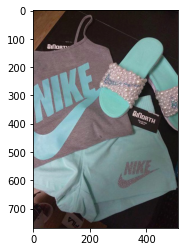

In [10]:
#Read image
path3 = 'F://Uni/992/Digital Image Processing/Homeworks/DIP_HW1/inputs/P3/nike_outfit.png'
pic3 = load_pic(path3)
plt.imshow(pic3)

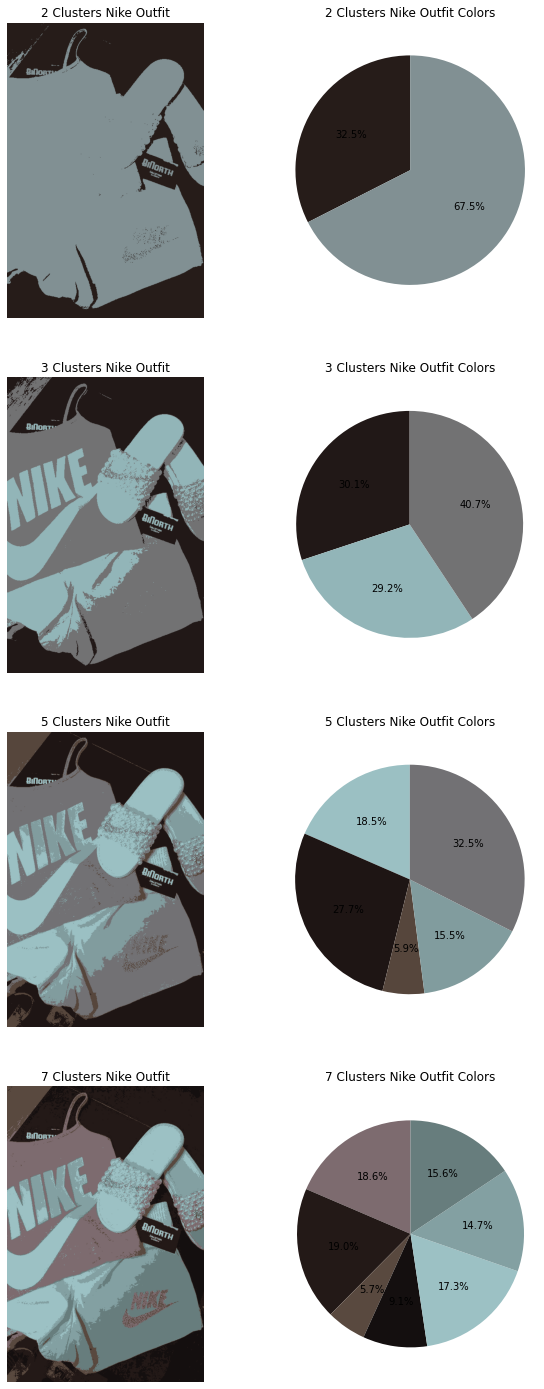

In [11]:
fig = plt.figure(figsize=(10,25))
i=1
#using the functuin ClusterColor for K-Means and coloring
for k in klist:
    plt.subplot(4,2,i)
    plt.title(str(k)+' Clusters Nike Outfit')
    plt.axis('off')
    img, count, centroids = ClusterColor(pic3,k)
    plt.imshow(img)
    i+=1
    plt.subplot(4,2,i)
    plt.title(str(k)+' Clusters Nike Outfit Colors')
    #print(centroids)
    plt.pie(count, startangle=90, autopct='%1.1f%%', colors=[centroids[j]/255 for j in range(k)])
    plt.axis('equal')
    i+=1
plt.show()

## Candy Box

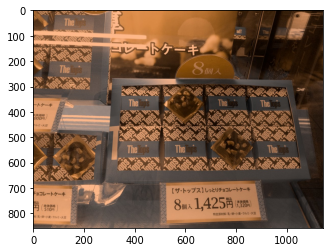

In [10]:
#Read image
path4 = 'F://Uni/992/Digital Image Processing/Homeworks/DIP_HW1/inputs/P3/candy_box.png'
pic4 = load_pic(path4)
plt.imshow(pic4)

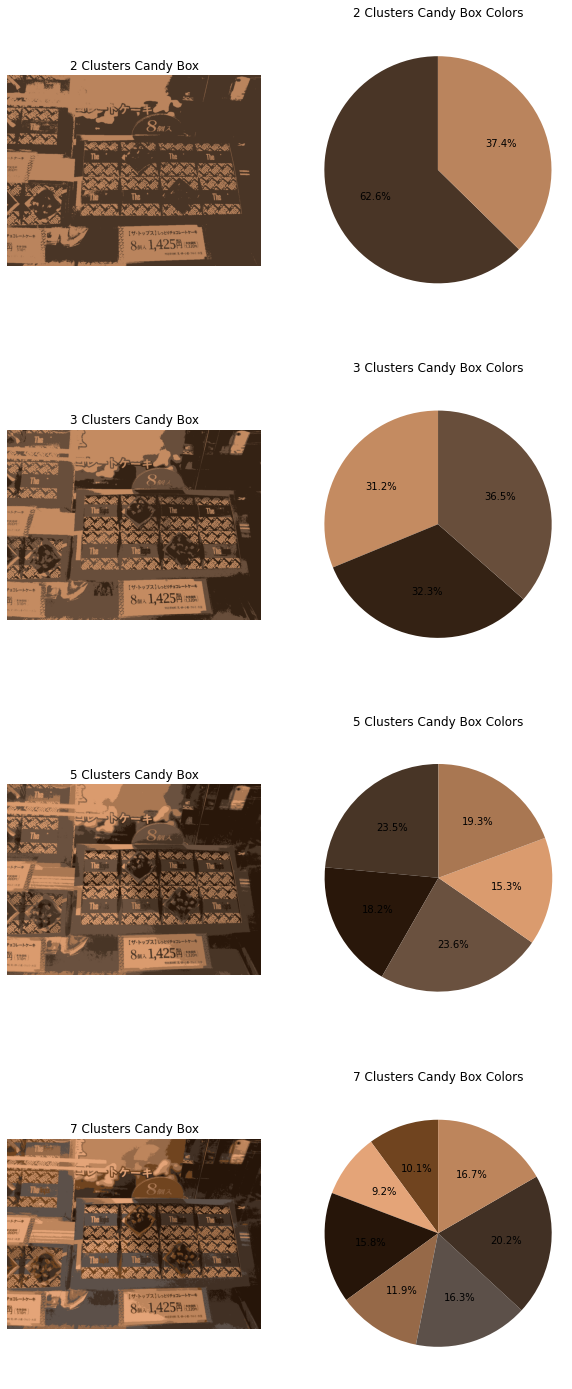

In [11]:
fig = plt.figure(figsize=(10,25))
i=1
#using the functuin ClusterColor for K-Means and coloring
for k in klist:
    plt.subplot(4,2,i)
    plt.title(str(k)+' Clusters Candy Box')
    plt.axis('off')
    img, count, centroids = ClusterColor(pic4,k)
    plt.imshow(img)
    i+=1
    plt.subplot(4,2,i)
    plt.title(str(k)+' Clusters Candy Box Colors')
    #print(centroids)
    plt.pie(count, startangle=90, autopct='%1.1f%%', colors=[centroids[j]/255 for j in range(k)])
    plt.axis('equal')
    i+=1
plt.show()